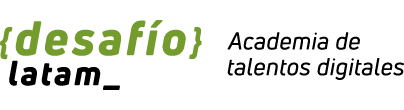

#<center><strong><font color="green">Solución Desafío - Aprendizaje supervisado y no supervisado (parte II)</font></strong></center>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency, ks_2samp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('Telco-Customer-Churn.csv')

## Analisis de Calidad de Datos

In [ ]:
def data_quality_analysis(df):
    # Crear un nuevo dataframe para almacenar los resultados
    result_df = pd.DataFrame(columns=['Columna', 'Tipo de dato', 'Valores únicos', 'Valores faltantes'])

    # Obtener información general del dataframe
    columns = df.columns
    data_types = df.dtypes.to_list()
    unique_values = [df[column].nunique() for column in columns]
    missing_values = [df[column].isnull().sum() for column in columns]

    # Llenar el nuevo dataframe con los resultados
    result_df['Columna'] = columns
    result_df['Tipo de dato'] = data_types
    result_df['Valores únicos'] = unique_values
    result_df['Valores faltantes'] = missing_values

    return result_df

# Ejemplo de uso de la función con el dataframe 'df'
analysis_result = data_quality_analysis(df).set_index('Columna')
print(analysis_result)

                 Tipo de dato  Valores únicos  Valores faltantes
Columna                                                         
customerID             object            7043                  0
gender                 object               2                  0
SeniorCitizen           int64               2                  0
Partner                object               2                  0
Dependents             object               2                  0
tenure                  int64              73                  0
PhoneService           object               2                  0
MultipleLines          object               3                  0
InternetService        object               3                  0
OnlineSecurity         object               3                  0
OnlineBackup           object               3                  0
DeviceProtection       object               3                  0
TechSupport            object               3                  0
StreamingTV            ob

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype('float')
# Ejemplo de uso de la función con el dataframe 'df'
analysis_result = data_quality_analysis(df).set_index('Columna')
print(analysis_result)

                 Tipo de dato  Valores únicos  Valores faltantes
Columna                                                         
customerID             object            7043                  0
gender                 object               2                  0
SeniorCitizen           int64               2                  0
Partner                object               2                  0
Dependents             object               2                  0
tenure                  int64              73                  0
PhoneService           object               2                  0
MultipleLines          object               3                  0
InternetService        object               3                  0
OnlineSecurity         object               3                  0
OnlineBackup           object               3                  0
DeviceProtection       object               3                  0
TechSupport            object               3                  0
StreamingTV            ob

## Analisis Exploratorio de los datos

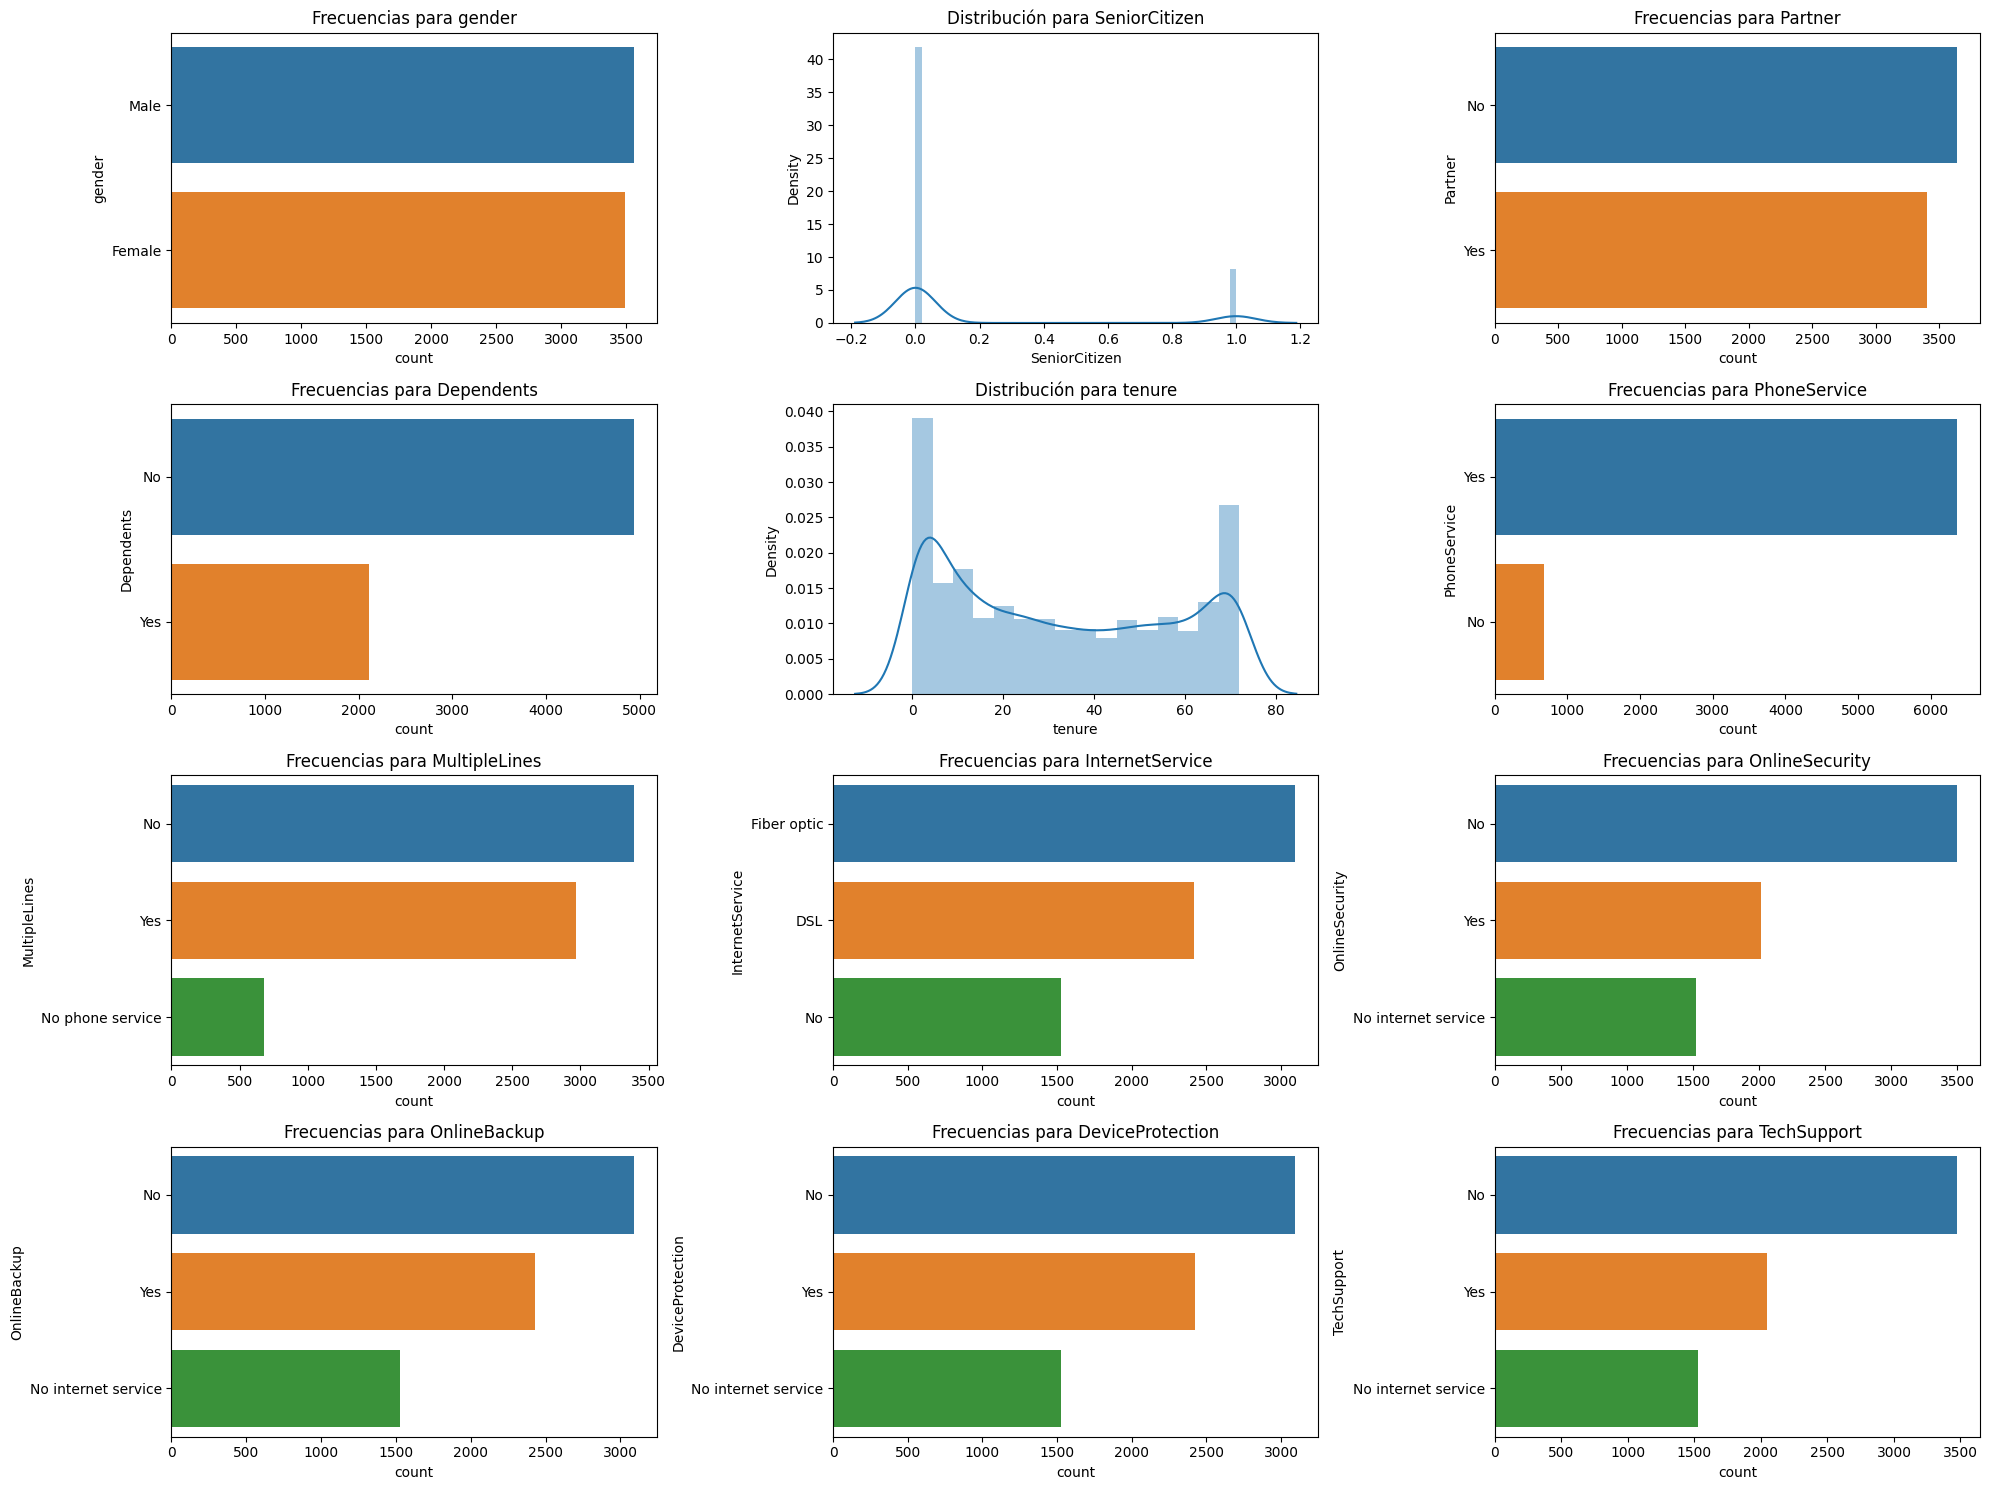

In [ ]:
plt.figure(figsize=(20, 15))
for n, i in enumerate(analysis_result.index.to_list()[1:][:12]):
    plt.subplot(4, 3, n + 1)
    if analysis_result.loc[i, 'Tipo de dato']=='object':
        sns.countplot(y= df[i], order = df[i].value_counts().index)
        plt.title('Frecuencias para {}'.format(i))
        plt.tight_layout()
    else:
        sns.distplot(df[i])
        plt.title('Distribución para {}'.format(i))
        plt.tight_layout()

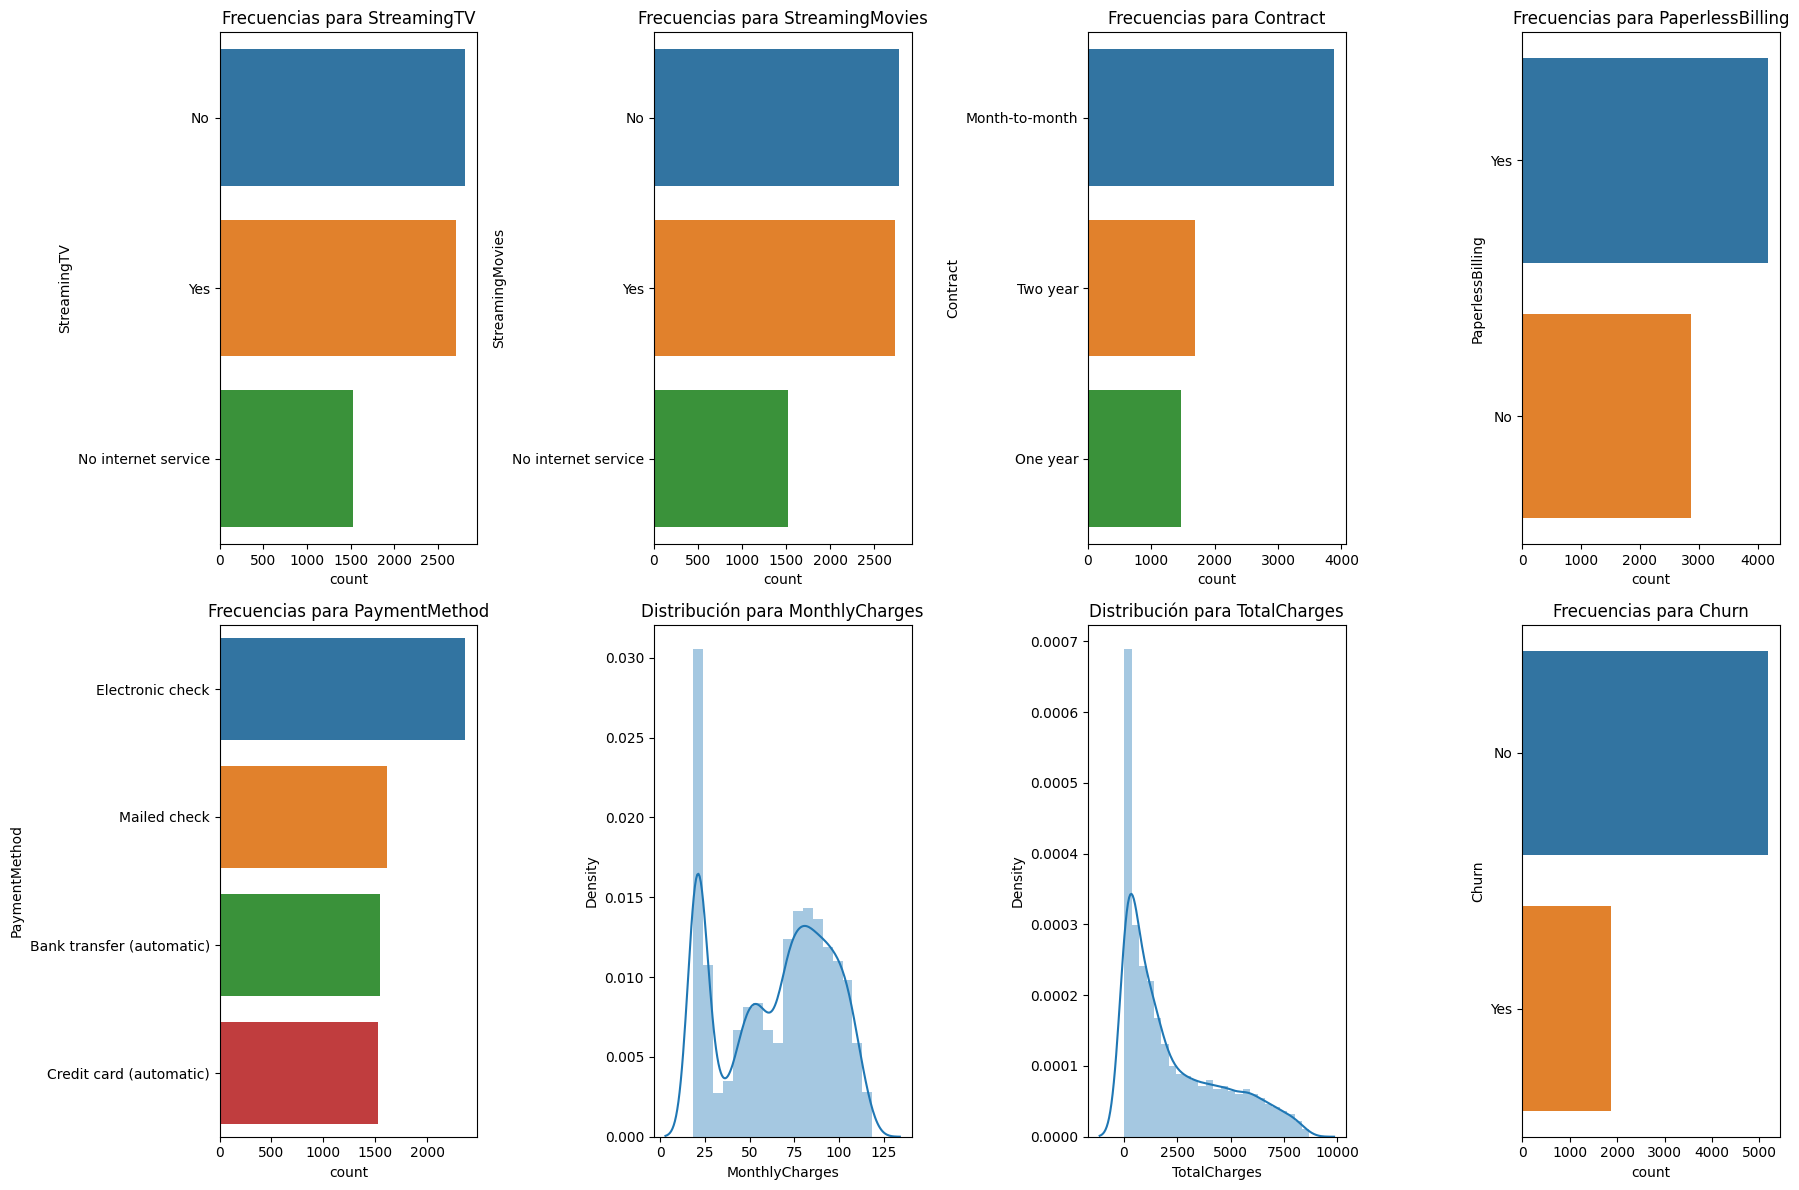

In [ ]:
plt.figure(figsize=(18, 12))
for n, i in enumerate(analysis_result.index.to_list()[1:][12:]):
    plt.subplot(2, 4, n + 1)
    if analysis_result.loc[i, 'Tipo de dato']=='object':
        sns.countplot(y= df[i], order = df[i].value_counts().index)
        plt.title('Frecuencias para {}'.format(i))
        plt.tight_layout()
    else:
        sns.distplot(df[i])
        plt.title('Distribución para {}'.format(i))
        plt.tight_layout()

## Correlación chi-cuadrado entre variables categóricas y Churn

In [ ]:
categorical_features = df.select_dtypes(include=[object]).columns.tolist()
for feature in categorical_features:
    chi2, p, _, _ = chi2_contingency(pd.crosstab(df[feature], df['Churn']))
    print(f"Chi-cuadrado entre {feature} y Churn: {chi2:.2f}, p-value: {p:.4f}")

Chi-cuadrado entre customerID y Churn: 7043.00, p-value: 0.4944
Chi-cuadrado entre gender y Churn: 0.48, p-value: 0.4866
Chi-cuadrado entre Partner y Churn: 158.73, p-value: 0.0000
Chi-cuadrado entre Dependents y Churn: 189.13, p-value: 0.0000
Chi-cuadrado entre PhoneService y Churn: 0.92, p-value: 0.3388
Chi-cuadrado entre MultipleLines y Churn: 11.33, p-value: 0.0035
Chi-cuadrado entre InternetService y Churn: 732.31, p-value: 0.0000
Chi-cuadrado entre OnlineSecurity y Churn: 850.00, p-value: 0.0000
Chi-cuadrado entre OnlineBackup y Churn: 601.81, p-value: 0.0000
Chi-cuadrado entre DeviceProtection y Churn: 558.42, p-value: 0.0000
Chi-cuadrado entre TechSupport y Churn: 828.20, p-value: 0.0000
Chi-cuadrado entre StreamingTV y Churn: 374.20, p-value: 0.0000
Chi-cuadrado entre StreamingMovies y Churn: 375.66, p-value: 0.0000
Chi-cuadrado entre Contract y Churn: 1184.60, p-value: 0.0000
Chi-cuadrado entre PaperlessBilling y Churn: 258.28, p-value: 0.0000
Chi-cuadrado entre PaymentMethod

## Correlación de Pearson entre las variables numéricas y Churn

In [ ]:

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numeric_features:
    dfi = df.loc[:, [feature, 'Churn']].dropna()
    corr, _ = pearsonr(dfi[feature], dfi['Churn'].replace({'No': 0, 'Yes':1}))
    print(f"Correlación de Pearson entre {feature} y Churn: {corr:.2f}")

Correlación de Pearson entre SeniorCitizen y Churn: 0.15
Correlación de Pearson entre tenure y Churn: -0.35
Correlación de Pearson entre MonthlyCharges y Churn: 0.19
Correlación de Pearson entre TotalCharges y Churn: -0.20


## Transformacion y division del dataset

In [ ]:
# Eliminar columnas no relevantes para el análisis
df_final = df.drop(['customerID'], axis=1).dropna()

# Codificar variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features[1:]:
    df_final[feature] = label_encoder.fit_transform(df_final[feature])

# Separar las variables predictoras y la variable objetivo
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables numéricas para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


## Entrenamiento de modelos

In [ ]:
# Definir los valores de hiperparámetros para el modelo KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

# Crear y entrenar el modelo KNN con GridSearchCV
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Obtener el mejor modelo KNN con los mejores hiperparámetros
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluar el rendimiento del modelo KNN con los mejores hiperparámetros
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(grid_search_knn.best_params_)
print("Precisión del modelo KNN con mejores hiperparámetros:", accuracy_knn)

{'metric': 'manhattan', 'n_neighbors': 9}
Precisión del modelo KNN con mejores hiperparámetros: 0.7455579246624022


In [ ]:
# Definir los valores de hiperparámetros para el modelo de árbol de decisión
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear y entrenar el modelo de árbol de decisión con GridSearchCV
tree = DecisionTreeClassifier(random_state=42)
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Obtener el mejor modelo de árbol de decisión con los mejores hiperparámetros
best_tree = grid_search_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

# Evaluar el rendimiento del modelo de árbol de decisión con los mejores hiperparámetros
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(grid_search_tree.best_params_)
print("Precisión del modelo de árbol de decisión con mejores hiperparámetros:", accuracy_tree)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Precisión del modelo de árbol de decisión con mejores hiperparámetros: 0.7882018479033405


## Evaluacion del mejor modelo

Precisión del modelo: 0.79


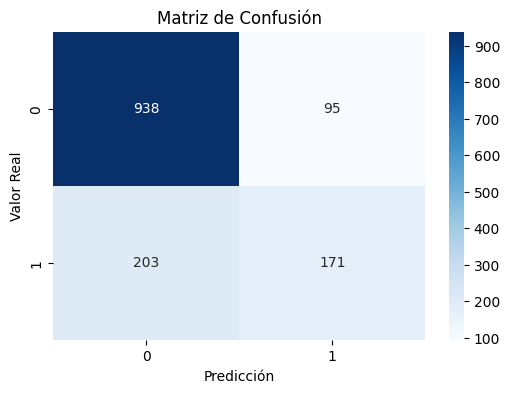

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [ ]:
def evaluate_model(model, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy del modelo: {accuracy:.2f}")

    # Generar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title('Matriz de Confusión')
    plt.show()

    # Mostrar el reporte de clasificación con métricas como precisión, recall y f1-score
    report = classification_report(y_test, y_pred)
    print("Reporte de clasificación:")
    print(report)

# Utilizar la función para evaluar el modelo KNN con los mejores hiperparámetros
evaluate_model(best_tree, X_test, y_test)